In [1]:
import Ativo as at
import FileManager as fman
import pickle
import pandas as pd
import numpy as np
# import datetime
from matplotlib import pyplot as plt
import TradesAnalyser as ta
import seaborn as sns

In [2]:
fm = fman.FileManager()

In [3]:
with open('AtivoDiaList.pkl', 'rb') as filehandle: # w de write e b de binary
    ativo_dia_list = pickle.load(filehandle) # notar como para salvar precisamos passar a list e o filehandle, mas pra abrir não

In [4]:
an = ta.TradesAnalyser(ativo_dia_list)

In [5]:
an.setFilterParameters(F_high_threshold=3)
an.runFiltering()

In [6]:
an.setSimParameters(start_money = 10000,allocation=0.2)
an.setAlgoParameters(short_after=0)
an.runSimulation()
# an.saveTrades('case1_trades.pkl')

# an.openTrades('case1_trades.pkl')

In [7]:
dfd = an.getFilteredDays() # DataFrame of filtered ativo-dias
dft = an.getTrades() # DataFrame of trades

In [8]:
# CALCULA DATAFRAME DE TRADE RESULTS, QUE VAI PEGAR ELEMENTOS QUE INTERESSAM DA INNER JOIN ENTRE dfd e dft
dftr = pd.merge(dft,dfd,how='inner',on=['name','date'])
dftr = dftr[['name','date','gap','factorF','profit','cumprofit']]
dftr

,name,date,gap,factorF,profit,cumprofit
0,NNDM,2019-10-23,0.567944,0.112574,0.300000,1.060000
1,XNET,2019-10-28,0.259833,0.272726,0.065743,1.073938
2,RDHL,2019-11-04,0.216450,0.309420,0.132859,1.102474
3,FPAY,2019-11-05,0.396450,0.201564,0.254237,1.158532
4,CLVS,2019-11-07,0.201117,0.057849,-0.006558,1.157012
...,...,...,...,...,...,...
358,CPSS,2020-10-08,0.474474,0.881575,0.044807,56.023973
359,VVPR,2020-10-09,0.588766,17.884116,-0.300000,52.662535
360,EFOI,2020-10-14,0.301190,11.626096,0.246569,55.259525
361,IDXG,2020-10-14,0.367893,6.666351,-0.300000,51.943954


In [9]:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
gap = np.clip( dftr['gap'], bins[0], bins[-1] )
dftr.groupby(pd.cut(gap, bins)).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
gap,,,,,,,,
"(0.2, 0.3]",0.720000,0.280000,0.047447,0.128367,-0.160631,75,54.0,21.0
"(0.3, 0.4]",0.800000,0.200000,0.073544,0.146878,-0.219789,45,36.0,9.0
"(0.4, 0.5]",0.707317,0.292683,0.041490,0.166339,-0.260229,41,29.0,12.0
"(0.5, 0.6]",0.744186,0.255814,0.064042,0.173231,-0.253596,43,32.0,11.0
"(0.6, 0.7]",0.678571,0.321429,0.041968,0.189497,-0.269480,28,19.0,9.0
"(0.7, 0.8]",0.722222,0.277778,0.050772,0.173415,-0.268101,18,13.0,5.0
"(0.8, 0.9]",0.631579,0.368421,0.059654,0.249503,-0.265801,19,12.0,7.0
"(0.9, 1.0]",0.888889,0.111111,0.193414,0.255090,-0.300000,9,8.0,1.0
"(1.0, 1.1]",0.750000,0.250000,0.135921,0.273147,-0.275758,12,9.0,3.0


In [10]:
dftr.groupby(dftr['date'].dt.to_period('M')).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
date,,,,,,,,
2019-10,1.000000,0.000000,0.182872,0.182872,NaN,2,2.0,0.0
2019-11,0.818182,0.181818,0.148976,0.216144,-0.153279,11,9.0,2.0
2019-12,0.555556,0.444444,0.038118,0.196324,-0.159640,9,5.0,4.0
2020-01,0.714286,0.285714,0.029356,0.141070,-0.249928,21,15.0,6.0
2020-02,0.800000,0.200000,0.108204,0.210255,-0.300000,20,16.0,4.0
2020-03,0.583333,0.416667,0.015459,0.197524,-0.239433,36,21.0,15.0
2020-04,0.653846,0.346154,0.038521,0.191636,-0.250695,26,17.0,9.0
2020-05,0.866667,0.133333,0.110933,0.163589,-0.231330,30,26.0,4.0
2020-06,0.645161,0.354839,0.051577,0.225665,-0.264947,62,40.0,22.0


In [11]:
an.printSimResults()

prevol_threshold 800000
open_dolar_threshold 2
gap_threshold 0.2
F_low_threshold 0
F_high_threshold 3

short_after 0
exit_target 0.3
exit_stop 0.3

start_money 10000
allocation 0.2

Start Money: $10,000.00
End Money: $488,273.16
Max Drawdown: -0.29038779584874397
Number of Trades: 363
Number of filtered ativo-dias: 363


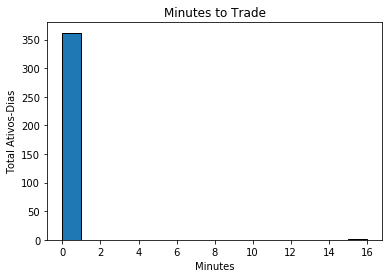

In [12]:
an.plotHistMinsToTrade()

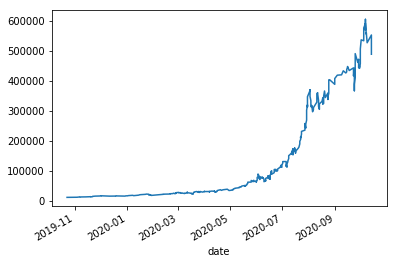

In [13]:
an.plotEquityCurve(logy=False)

In [14]:
an.maxDrawdown()

-0.29038779584874397

In [15]:
an.getSimResults()

,prevol_threshold,open_dolar_threshold,gap_threshold,F_low_threshold,F_high_threshold,short_after,exit_target,exit_stop,start_money,allocation,end_money,profit,max_drawdown,n_trades,n_filtered_ativo_days
0,800000,2,0.2,0,3,0,0.3,0.3,10000,0.2,488273.163429,46.827316,-0.290388,363,363
